# Exercício de Algoritmos de Classificação — Dataset de drogas/medicamentos
## Importação das bibliotecas e inicialização do dataframe

In [490]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

df = pd.read_csv("drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [491]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

## Procurando por valores nulos ou Not a Number

In [492]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [493]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

## Checando as drogas e a quantidade de cada uma

In [494]:
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

## Limpando as colunas e definindo o target da classificação

In [495]:
features = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
target = 'Drug'

clean_df = df[features]
clean_target = df[target]

## Utilizando LabelEncoder para transformar as colunas de BP e Colesterol

In [496]:
from sklearn.preprocessing import LabelEncoder

le_bp = LabelEncoder()
le_col = LabelEncoder()

clean_df['BP'] = le_bp.fit_transform(clean_df['BP'])
clean_df['Cholesterol'] = le_col.fit_transform(clean_df['Cholesterol'])

C:\Users\disrct\AppData\Local\Temp\ipykernel_12476\2127780391.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\disrct\AppData\Local\Temp\ipykernel_12476\2127780391.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Utilizando One-Hot Encoding para transformar a coluna de sexo

In [497]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehot_sex = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1])], remainder='passthrough')
clean_df = onehot_sex.fit_transform(clean_df)

In [498]:
clean_df

array([[ 1.   ,  0.   , 23.   ,  0.   ,  0.   , 25.355],
       [ 0.   ,  1.   , 47.   ,  1.   ,  0.   , 13.093],
       [ 0.   ,  1.   , 47.   ,  1.   ,  0.   , 10.114],
       ...,
       [ 0.   ,  1.   , 52.   ,  2.   ,  0.   ,  9.894],
       [ 0.   ,  1.   , 23.   ,  2.   ,  1.   , 14.02 ],
       [ 1.   ,  0.   , 40.   ,  1.   ,  1.   , 11.349]], shape=(200, 6))

## Colunas transformadas (anotações)

clean_df[0] = Feminino
clean_df[1] = Masculino
clean_df[3] = BP — 0 = HIGH, 1 = LOW, 2 = NORMAL
clean_df[4] = Cholesterol — 0 = HIGH, 1 = NORMAL

<Axes: xlabel='Drug', ylabel='count'>

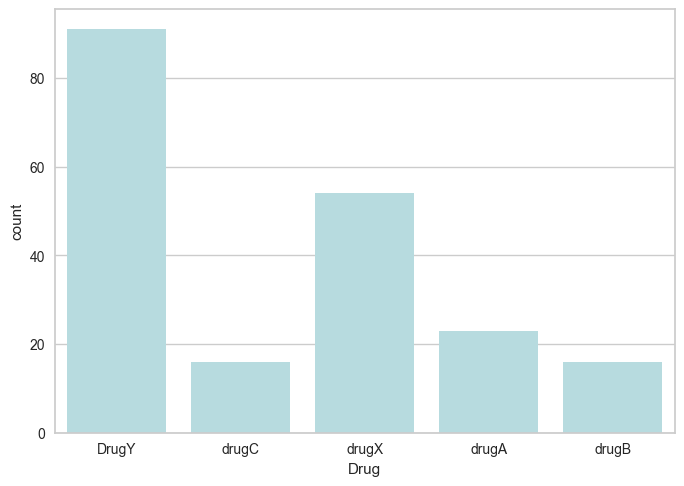

In [499]:
sns.countplot(x = df['Drug'], color="powderblue")

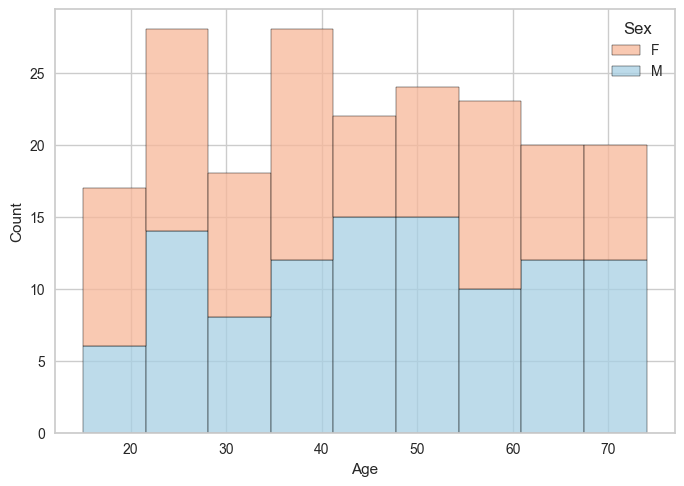

In [500]:
sns.histplot(data=df, x='Age', hue='Sex', multiple='stack', palette='RdBu')
plt.show()

In [501]:
grafico = px.treemap(df, path=['Drug', 'Age'], color='Drug',
    color_discrete_sequence=px.colors.qualitative.Pastel2)
grafico.show()

In [502]:
grafico = px.treemap(df, path=['BP', 'Cholesterol', 'Age'], color='BP',
    color_discrete_sequence=px.colors.qualitative.Pastel1)
grafico.show()

In [503]:
grafico = px.parallel_categories(df, dimensions=['Drug', 'Sex'])
grafico.show()

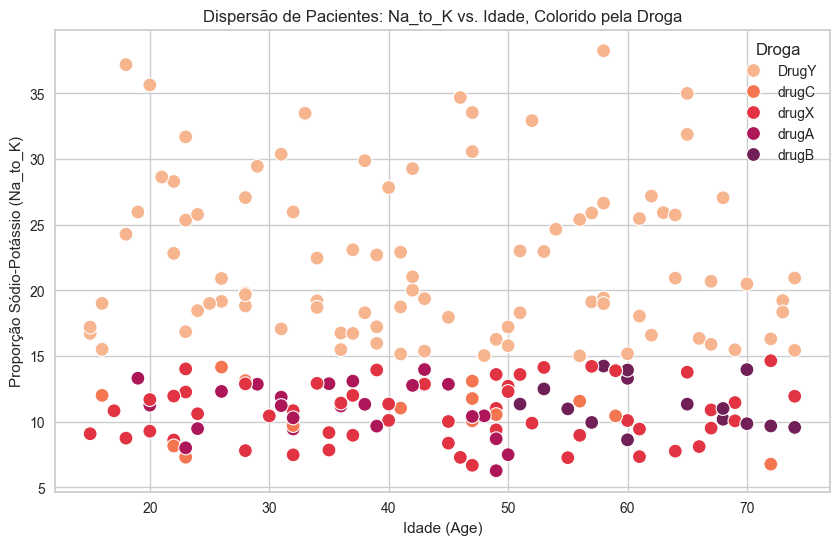

In [504]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Na_to_K', hue='Drug', data=df, s=100)
plt.title('Dispersão de Pacientes: Na_to_K vs. Idade, Colorido pela Droga')
plt.xlabel('Idade (Age)')
plt.ylabel('Proporção Sódio-Potássio (Na_to_K)')
plt.legend(title='Droga')
plt.grid(True)
plt.savefig('drug200_scatter_plot.png')

## Separando dados de treinamento e dados de teste

In [505]:
from sklearn.model_selection import train_test_split

x_drugs_train, x_drugs_test, y_drugs_train, y_drugs_test = train_test_split(clean_df, clean_target, test_size=0.3, random_state=0)
x_drugs_train.shape, x_drugs_test.shape

((140, 6), (60, 6))

# Testando diferentes algoritmos de classificação
## Naive Bayes

In [506]:
from sklearn.naive_bayes import GaussianNB

naive_drugs = GaussianNB()
naive_drugs.fit(x_drugs_train, y_drugs_train)

model = naive_drugs

## Comparando as previsões do algoritmo com os dados reais

In [507]:
predictions = naive_drugs.predict(x_drugs_test)
predictions

array(['drugC', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX',
       'drugX', 'drugC', 'drugX', 'drugA', 'DrugY', 'DrugY', 'DrugY',
       'drugB', 'drugC', 'DrugY', 'DrugY', 'drugX', 'drugA', 'drugA',
       'drugX', 'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'drugX', 'drugC', 'drugA', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'drugC', 'drugA', 'drugX', 'DrugY', 'drugA',
       'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX', 'DrugY', 'drugA',
       'drugB', 'DrugY', 'drugB', 'DrugY', 'DrugY', 'drugC', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugB'], dtype='<U5')

In [508]:
np.array(y_drugs_test)

array(['drugC', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX',
       'drugX', 'DrugY', 'drugX', 'drugA', 'DrugY', 'DrugY', 'DrugY',
       'drugB', 'drugC', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'drugX', 'drugC', 'drugA', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'drugA', 'drugX', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugA',
       'DrugY', 'DrugY', 'drugB', 'DrugY', 'DrugY', 'drugC', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugB'], dtype=object)

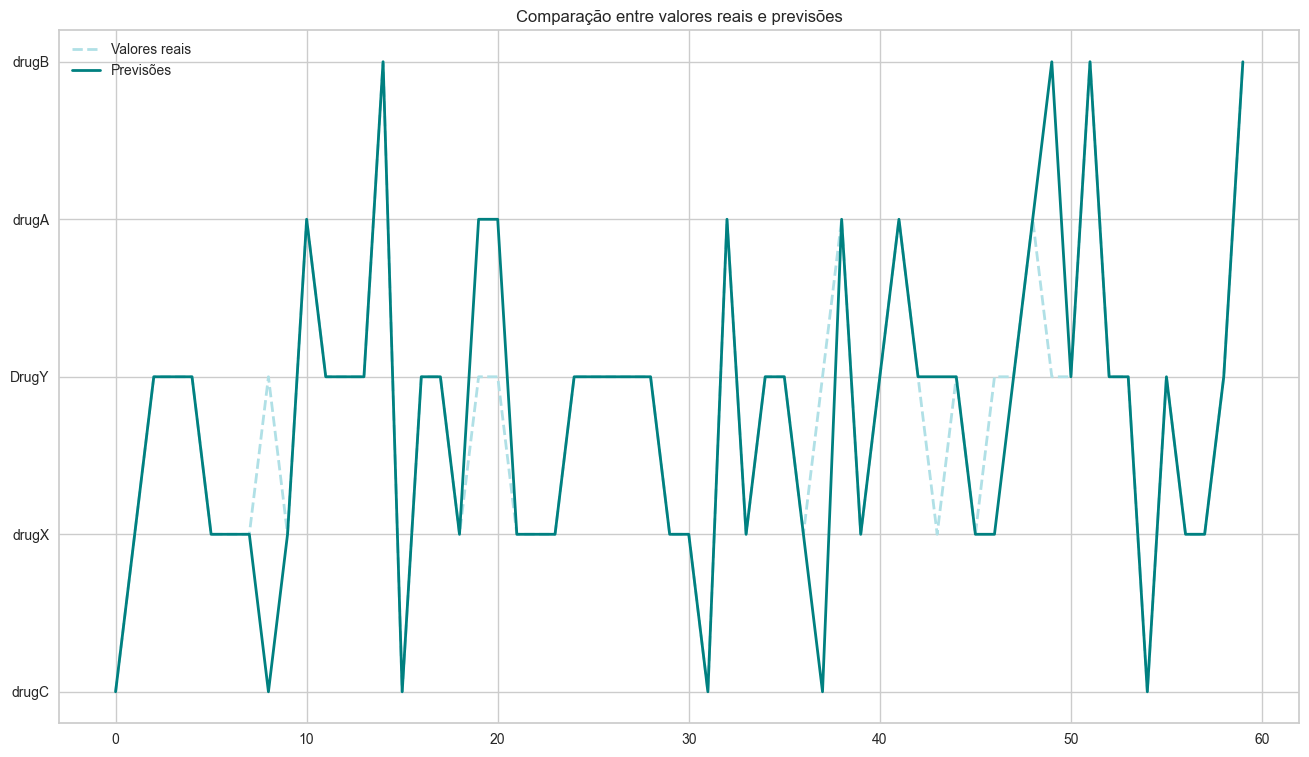

In [509]:
plt.figure(figsize=(16,9))
plt.plot(np.array(y_drugs_test), label="Valores reais", linestyle='--', linewidth=2, color='powderblue')
plt.plot(predictions, label="Previsões", linewidth=2, color='teal')

plt.title("Comparação entre valores reais e previsões")
plt.legend()
plt.grid(True)
plt.show()

## Acurácia

In [510]:
from sklearn.metrics import accuracy_score

pred = model.predict(x_drugs_test)
accuracy = accuracy_score(y_drugs_test, pred)
accuracy

0.8833333333333333

## Matriz de Confusão

0.8833333333333333

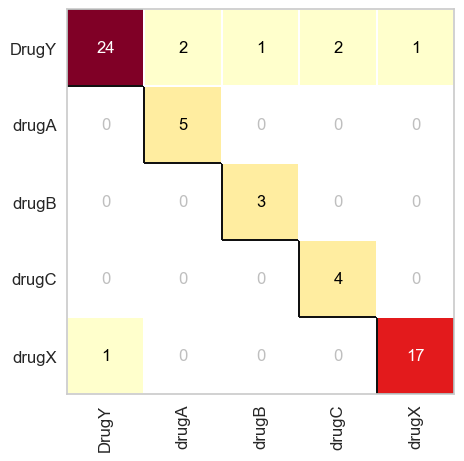

In [511]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(5,5))

pred = model.predict(x_drugs_test)
cm = ConfusionMatrix(model)
cm.fit(x_drugs_train, y_drugs_train)
cm.score(x_drugs_test, y_drugs_test)

## Classification Report

In [512]:
from sklearn.metrics import classification_report

print(classification_report(y_drugs_test, pred)) 

              precision    recall  f1-score   support

       DrugY       0.96      0.80      0.87        30
       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.94      0.94      0.94        18

    accuracy                           0.88        60
   macro avg       0.81      0.95      0.86        60
weighted avg       0.90      0.88      0.89        60



## Decision Tree Classifier

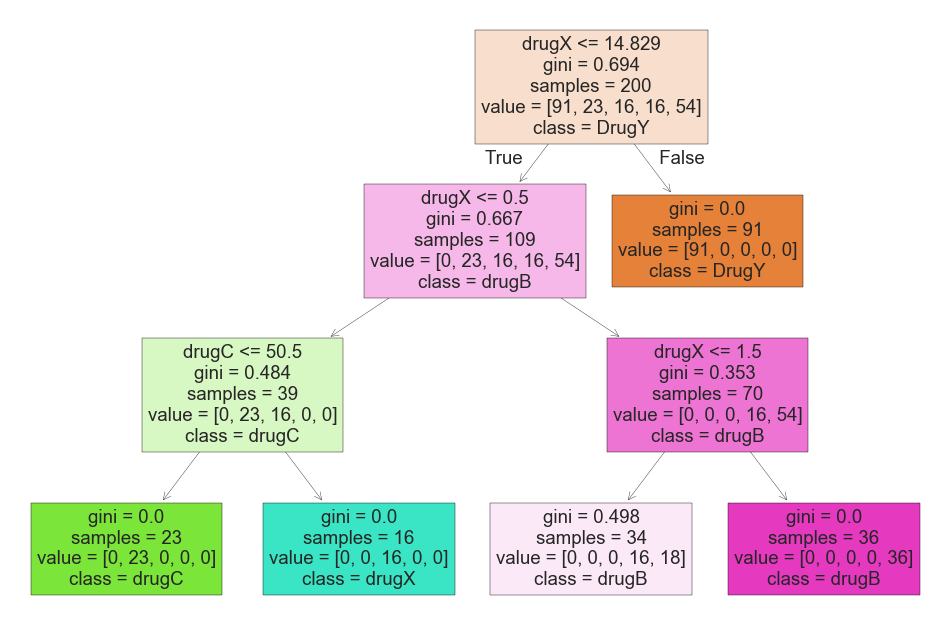

In [513]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
tree.fit(clean_df, clean_target)

model = tree

plt.figure(figsize=(12,8))
plot_tree(tree, feature_names=clean_target, class_names=clean_target.unique(), filled=True)
plt.show()

## Comparando as previsões do algoritmo com os dados reais

In [514]:
predictions = tree.predict(x_drugs_test)
predictions

array(['drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX',
       'drugX', 'DrugY', 'drugX', 'drugA', 'DrugY', 'DrugY', 'DrugY',
       'drugB', 'drugX', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'drugA', 'drugX', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugA',
       'DrugY', 'DrugY', 'drugB', 'DrugY', 'DrugY', 'drugX', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugB'], dtype=object)

In [515]:
np.array(y_drugs_test)

array(['drugC', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX',
       'drugX', 'DrugY', 'drugX', 'drugA', 'DrugY', 'DrugY', 'DrugY',
       'drugB', 'drugC', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'drugX', 'drugC', 'drugA', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'drugA', 'drugX', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugA',
       'DrugY', 'DrugY', 'drugB', 'DrugY', 'DrugY', 'drugC', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugB'], dtype=object)

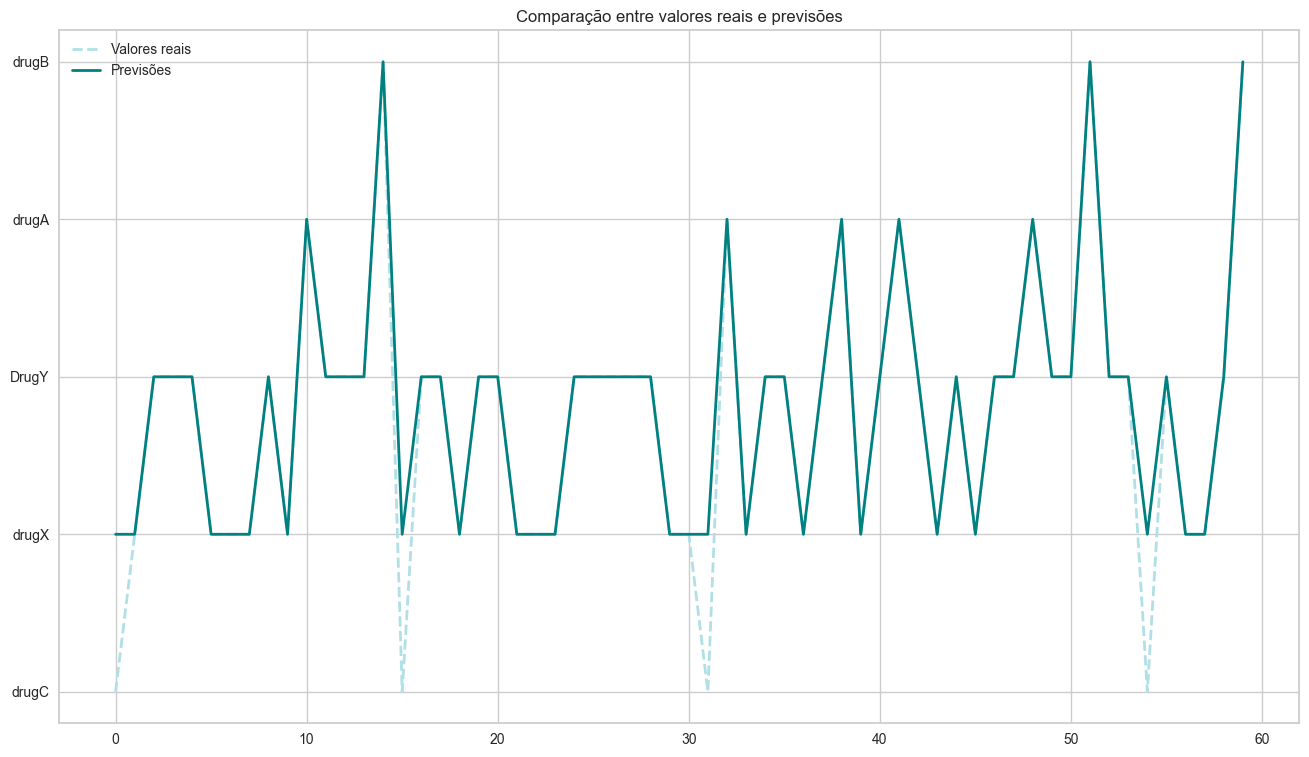

In [516]:
plt.figure(figsize=(16,9))
plt.plot(np.array(y_drugs_test), label="Valores reais", linestyle='--', linewidth=2, color='powderblue')
plt.plot(predictions, label="Previsões", linewidth=2, color='teal')

plt.title("Comparação entre valores reais e previsões")
plt.legend()
plt.grid(True)
plt.show()

## Acurácia

In [517]:
from sklearn.metrics import accuracy_score

pred = model.predict(x_drugs_test)
accuracy = accuracy_score(y_drugs_test, pred)
accuracy

0.9333333333333333

## Matriz de Confusão

0.9333333333333333

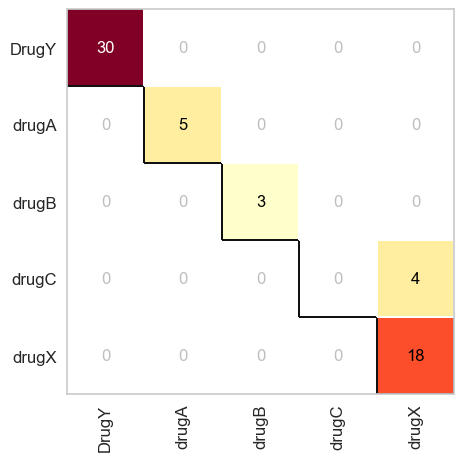

In [518]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(5,5))

pred = model.predict(x_drugs_test)
cm = ConfusionMatrix(model)
cm.fit(x_drugs_train, y_drugs_train)
cm.score(x_drugs_test, y_drugs_test)

## Classification Report

In [519]:
from sklearn.metrics import classification_report

print(classification_report(y_drugs_test, pred)) 

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        30
       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       0.00      0.00      0.00         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.93        60
   macro avg       0.76      0.80      0.78        60
weighted avg       0.88      0.93      0.90        60



c:\Users\disrct\Desktop\IA-Machine-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\disrct\Desktop\IA-Machine-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\disrct\Desktop\IA-Machine-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Regressão Logística

In [520]:
from sklearn.linear_model import LogisticRegression

logistic_r = LogisticRegression(random_state=1, max_iter=100)
logistic_r.fit(x_drugs_train, y_drugs_train)

model = logistic_r

c:\Users\disrct\Desktop\IA-Machine-Learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## Comparando as previsões do algoritmo com os dados reais

In [521]:
predictions = logistic_r.predict(x_drugs_test)
predictions

array(['drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX',
       'drugX', 'DrugY', 'drugX', 'drugA', 'DrugY', 'DrugY', 'DrugY',
       'drugA', 'drugC', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'drugX', 'DrugY', 'DrugY', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'drugX', 'DrugY', 'drugA', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'drugA', 'drugX', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'drugX', 'drugX', 'DrugY', 'drugA',
       'drugB', 'DrugY', 'drugB', 'DrugY', 'DrugY', 'drugX', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugB'], dtype=object)

In [522]:
np.array(y_drugs_test)

array(['drugC', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX',
       'drugX', 'DrugY', 'drugX', 'drugA', 'DrugY', 'DrugY', 'DrugY',
       'drugB', 'drugC', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'drugX', 'drugC', 'drugA', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'drugA', 'drugX', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugA',
       'DrugY', 'DrugY', 'drugB', 'DrugY', 'DrugY', 'drugC', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugB'], dtype=object)

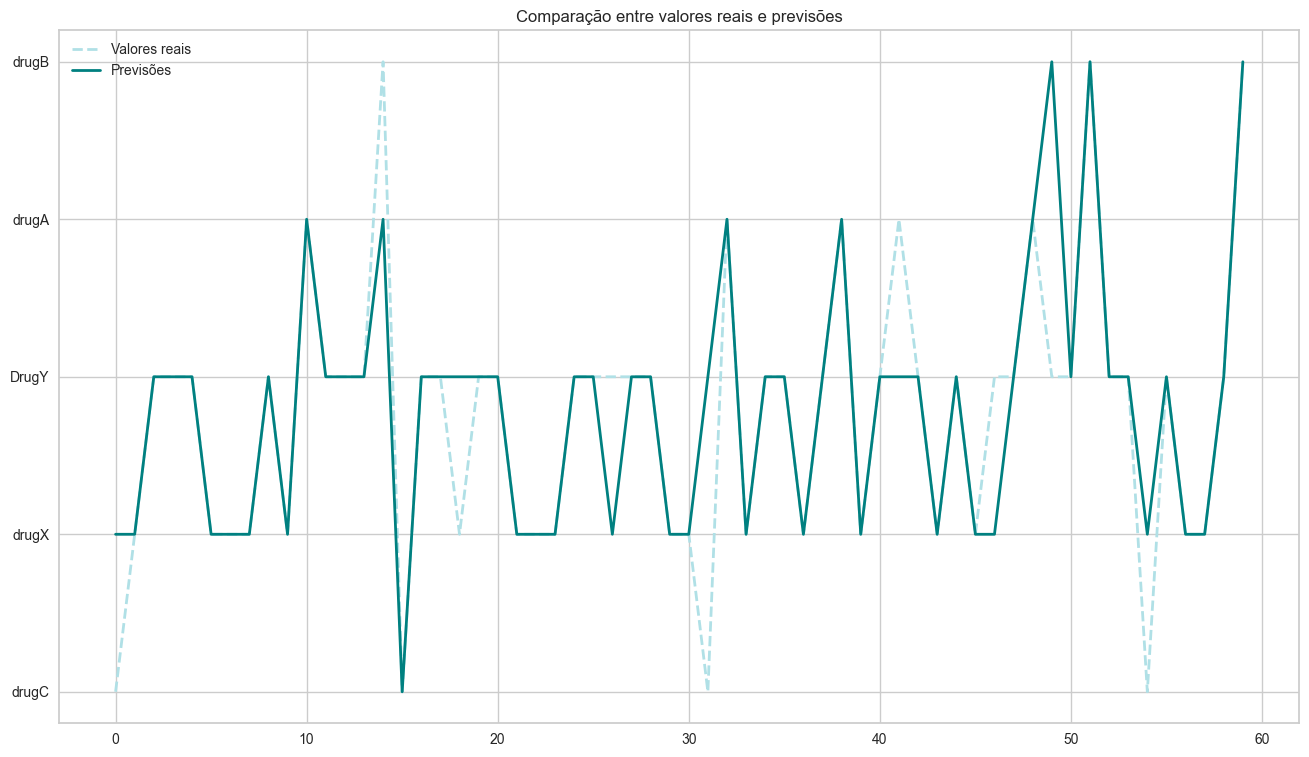

In [523]:
plt.figure(figsize=(16,9))
plt.plot(np.array(y_drugs_test), label="Valores reais", linestyle='--', linewidth=2, color='powderblue')
plt.plot(predictions, label="Previsões", linewidth=2, color='teal')

plt.title("Comparação entre valores reais e previsões")
plt.legend()
plt.grid(True)
plt.show()

## Acurácia

In [524]:
from sklearn.metrics import accuracy_score

pred = model.predict(x_drugs_test)
accuracy = accuracy_score(y_drugs_test, pred)
accuracy

0.85

## Matriz de Confusão

0.85

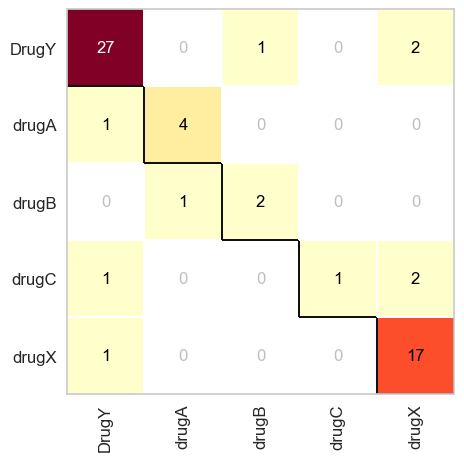

In [525]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(5,5))

pred = model.predict(x_drugs_test)
cm = ConfusionMatrix(model)
cm.fit(x_drugs_train, y_drugs_train)
cm.score(x_drugs_test, y_drugs_test)

## Classification Report

In [526]:
from sklearn.metrics import classification_report

print(classification_report(y_drugs_test, pred)) 

              precision    recall  f1-score   support

       DrugY       0.90      0.90      0.90        30
       drugA       0.80      0.80      0.80         5
       drugB       0.67      0.67      0.67         3
       drugC       1.00      0.25      0.40         4
       drugX       0.81      0.94      0.87        18

    accuracy                           0.85        60
   macro avg       0.84      0.71      0.73        60
weighted avg       0.86      0.85      0.84        60



## K-Nearest-Neighbors

In [527]:
from sklearn.neighbors import KNeighborsClassifier

knn_drugs = KNeighborsClassifier(n_neighbors=10)
knn_drugs.fit(x_drugs_train, y_drugs_train)

model = knn_drugs

## Comparando as previsões do algoritmo com os dados reais

In [528]:
predictions = knn_drugs.predict(x_drugs_test)
predictions

array(['drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX',
       'drugX', 'DrugY', 'drugB', 'drugX', 'DrugY', 'DrugY', 'DrugY',
       'drugB', 'drugX', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'drugA', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'drugB', 'DrugY', 'drugA', 'drugA', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'drugX', 'drugX', 'DrugY', 'drugA',
       'DrugY', 'drugB', 'DrugY', 'drugC', 'DrugY', 'DrugY', 'drugA',
       'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugX', 'DrugY',
       'drugX', 'drugA', 'DrugY', 'drugX'], dtype=object)

In [529]:
np.array(y_drugs_test)

array(['drugC', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX',
       'drugX', 'DrugY', 'drugX', 'drugA', 'DrugY', 'DrugY', 'DrugY',
       'drugB', 'drugC', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'drugX', 'drugC', 'drugA', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'drugA', 'drugX', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugA',
       'DrugY', 'DrugY', 'drugB', 'DrugY', 'DrugY', 'drugC', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugB'], dtype=object)

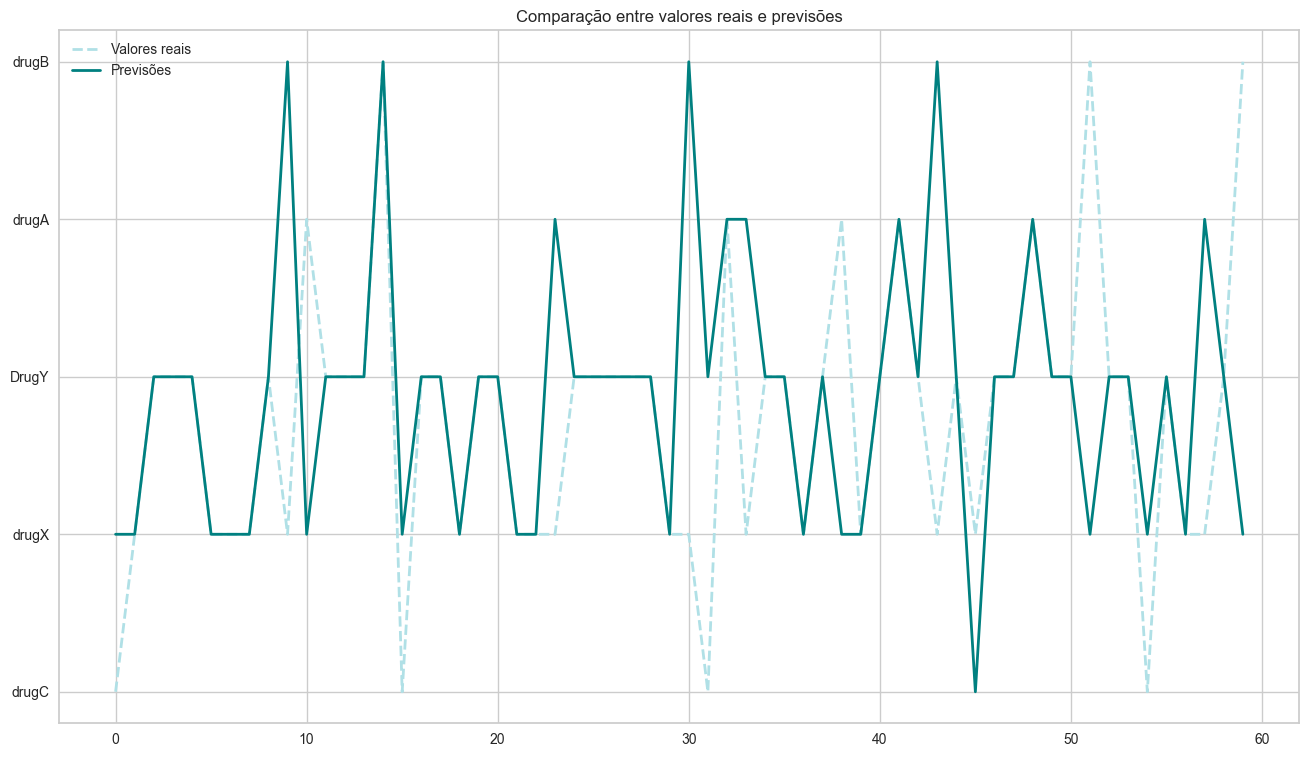

In [530]:
plt.figure(figsize=(16,9))
plt.plot(np.array(y_drugs_test), label="Valores reais", linestyle='--', linewidth=2, color='powderblue')
plt.plot(predictions, label="Previsões", linewidth=2, color='teal')

plt.title("Comparação entre valores reais e previsões")
plt.legend()
plt.grid(True)
plt.show()

## Acurácia

In [531]:
from sklearn.metrics import accuracy_score

pred = model.predict(x_drugs_test)
accuracy = accuracy_score(y_drugs_test, pred)
accuracy

0.75

## Matriz de Confusão

0.75

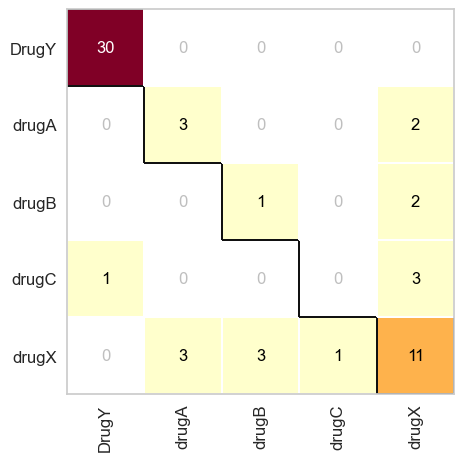

In [532]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(5,5))

pred = model.predict(x_drugs_test)
cm = ConfusionMatrix(model)
cm.fit(x_drugs_train, y_drugs_train)
cm.score(x_drugs_test, y_drugs_test)

## Classification Report

In [533]:
from sklearn.metrics import classification_report

print(classification_report(y_drugs_test, pred)) 

              precision    recall  f1-score   support

       DrugY       0.97      1.00      0.98        30
       drugA       0.50      0.60      0.55         5
       drugB       0.25      0.33      0.29         3
       drugC       0.00      0.00      0.00         4
       drugX       0.61      0.61      0.61        18

    accuracy                           0.75        60
   macro avg       0.47      0.51      0.49        60
weighted avg       0.72      0.75      0.73        60

